In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd

In [25]:
dataf=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/police.csv')

In [26]:
dataf

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,NaN,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,NaN,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,NaN,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,NaN,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [27]:
#We get information about the dataset.

dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [28]:
#We calculate the number of null values in each column of the dataset.

dataf.isna().sum()

,0
stop_date,0
stop_time,0
county_name,91741
driver_gender,5335
driver_age_raw,5327
driver_age,5621
driver_race,5333
violation_raw,5333
violation,5333
search_conducted,0


In [29]:
#We observe that the column 'stop_date' is of object type, so we will convert it to datetime type.
#The columns 'search_type' and 'county_name' have many nulls, so we will proceed with data cleaning.
#Then we check again for the changes that we have applied.

def dataCleaning(dataf):
  dataf=dataf.drop(['search_type','county_name'],axis=1)
  dataf['stop_date'] = pd.to_datetime(dataf['stop_date'])
  print(dataf.info())
  return dataf

In [30]:
dataf=dataCleaning(dataf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           91741 non-null  datetime64[ns]
 1   stop_time           91741 non-null  object        
 2   driver_gender       86406 non-null  object        
 3   driver_age_raw      86414 non-null  float64       
 4   driver_age          86120 non-null  float64       
 5   driver_race         86408 non-null  object        
 6   violation_raw       86408 non-null  object        
 7   violation           86408 non-null  object        
 8   search_conducted    91741 non-null  bool          
 9   stop_outcome        86408 non-null  object        
 10  is_arrested         86408 non-null  object        
 11  stop_duration       86408 non-null  object        
 12  drugs_related_stop  91741 non-null  bool          
dtypes: bool(2), datetime64[ns](1), float64(2), obj

In [31]:
#We create a new column named 'driver_age_group', where the values are derived from the 'driver_age' column.
#The values will be either 'young' or 'adult'.

dataf['driver_age_group']=dataf['driver_age'].apply(lambda x : 'young' if x<30 else 'adult' )

<Axes: xlabel='driver_age_group'>

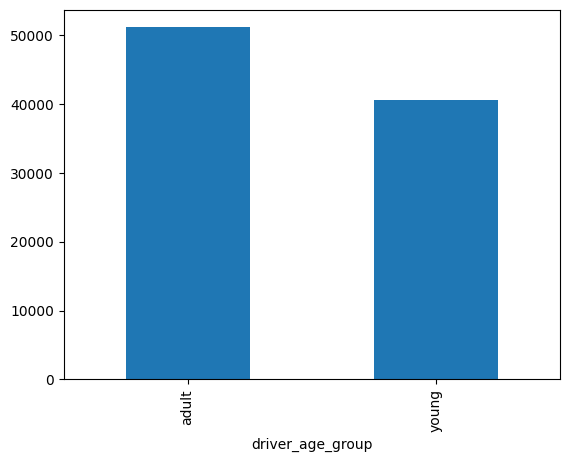

In [32]:
#We create a chart to compare the number of violations between adult and young drivers.

dataf['driver_age_group'].value_counts().plot(kind='bar')

In [33]:
#We extract the percentage between male (M) and female (F) when the violation is speeding.

dataf[dataf['violation']=='Speeding']['driver_gender'].value_counts(normalize=True)

,proportion
driver_gender,
M,0.680527
F,0.319473


<Axes: xlabel='violation'>

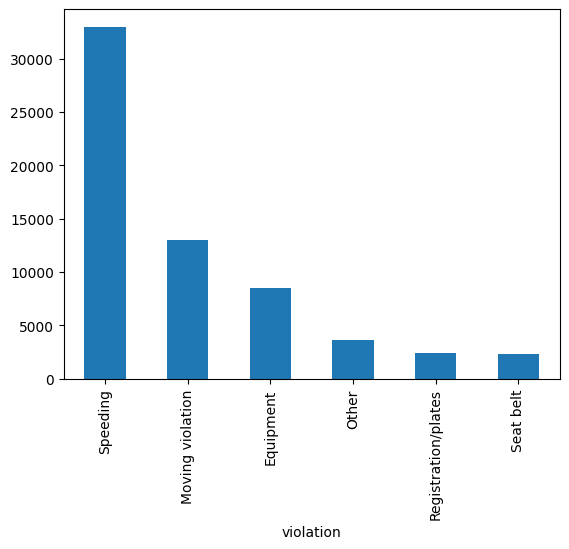

In [34]:
#We count and graph the different kinds of violation for males.

dataf[dataf['driver_gender']=="M"]['violation'].value_counts().plot(kind='bar')

<Axes: xlabel='violation'>

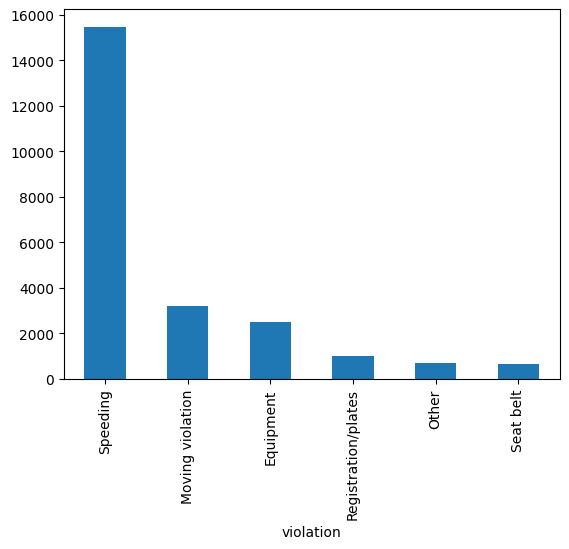

In [35]:
#We count and graph the different kinds of violation for females.

dataf[dataf['driver_gender']=="F"]['violation'].value_counts().plot(kind='bar')

In [36]:
#We group the violations by gender.

dataf.groupby('driver_gender')['violation'].value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: count, dtype: int64

<Axes: xlabel='driver_gender,violation'>

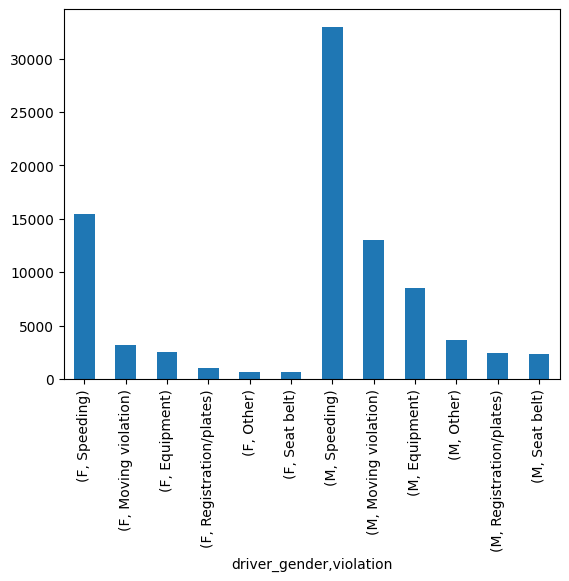

In [37]:
#We graph the above grouping.

dataf.groupby('driver_gender')['violation'].value_counts().plot(kind='bar')

In [38]:
#We group the genders by violation.

dataf.groupby('violation')['driver_gender'].value_counts()

violation            driver_gender
Equipment            M                 8533
                     F                 2487
Moving violation     M                13020
                     F                 3204
Other                M                 3627
                     F                  690
Registration/plates  M                 2419
                     F                 1013
Seat belt            M                 2317
                     F                  635
Speeding             M                32979
                     F                15482
Name: count, dtype: int64

<Axes: xlabel='violation,driver_gender'>

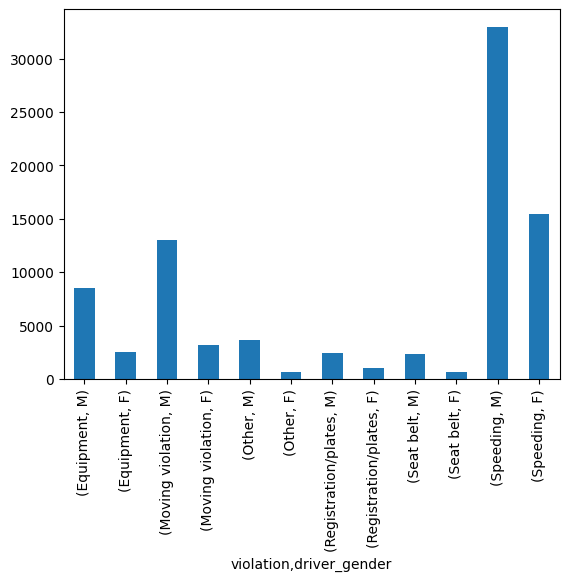

In [39]:
#We graph the above grouping.

dataf.groupby('violation')['driver_gender'].value_counts().plot(kind='bar')

In [40]:
#Because the data of the column 'stop_duration' is of object type, we create a dictionary to map and transform the values to numerical.

changes={'0-15 Min':8,'16-30 Min':20,'30+ Min':35}

In [41]:
#Here we transform them.

dataf['stop_duration']=dataf['stop_duration'].map(changes)

In [42]:
#We create a new column named 'is_stop_long' in which the values are derived from the 'stop_duration' column.
#The values will be either True or False. Value is True when stop duration is over 20 else is False.

dataf['is_stop_long']=dataf['stop_duration'].apply(lambda x: True if x>20 else False)

<Axes: xlabel='is_stop_long'>

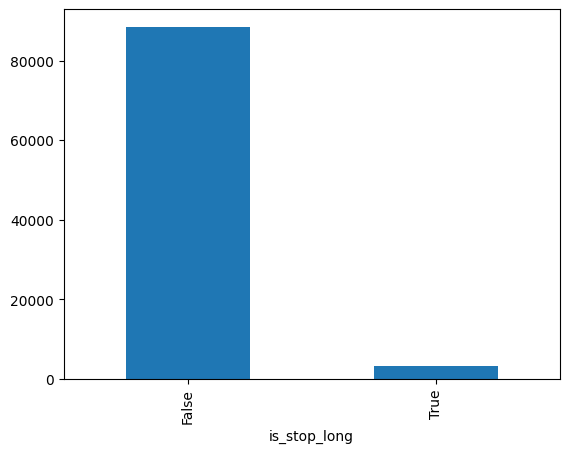

In [43]:
#We graph the number of True and False.

dataf['is_stop_long'].value_counts().plot(kind='bar')

In [44]:
#We filter the dataset based on when the stop duration is over 10 and when the type of violation is speeding.

dataf[(dataf['stop_duration']>10) & (dataf['violation']=='Speeding')]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,driver_age_group,is_stop_long
31,2005-09-28,06:20,M,1982.0,23.0,White,Speeding,Speeding,False,Arrest Driver,True,20.0,False,young,False
67,2005-10-01,23:25,M,1974.0,31.0,Asian,Speeding,Speeding,False,Citation,False,20.0,False,adult,False
80,2005-10-02,09:30,M,1975.0,30.0,White,Speeding,Speeding,True,Arrest Driver,True,35.0,False,adult,True
103,2005-10-03,13:26,M,1975.0,30.0,Black,Speeding,Speeding,False,Arrest Driver,True,35.0,False,adult,True
104,2005-10-03,13:26,M,1975.0,30.0,Black,Speeding,Speeding,False,Arrest Driver,True,35.0,False,adult,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91700,2015-12-30,08:51,F,1987.0,28.0,Hispanic,Speeding,Speeding,True,Citation,False,35.0,True,young,True
91711,2015-12-30,15:42,M,1974.0,41.0,White,Speeding,Speeding,False,Citation,False,20.0,False,adult,False
91714,2015-12-30,17:39,M,1996.0,19.0,Hispanic,Speeding,Speeding,False,Citation,False,20.0,False,young,False
91720,2015-12-31,06:32,M,1975.0,40.0,White,Speeding,Speeding,False,Citation,False,20.0,False,adult,False
